Let's try some test samples from a separate file:
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu

Let's try a sample entered in the terminal!
Sample with (width, height): (1.0, 1.0) classified as Pichu

Let's test the accuracy of the algorithm:
mea[0]['width'] = 21.959384499160468
mea[0]['width'] = 21.959384499160468
accuracies = [0.96, 0.98, 0.96, 1.0, 0.94, 0.92, 0.96, 0.94, 0.96, 0.92]


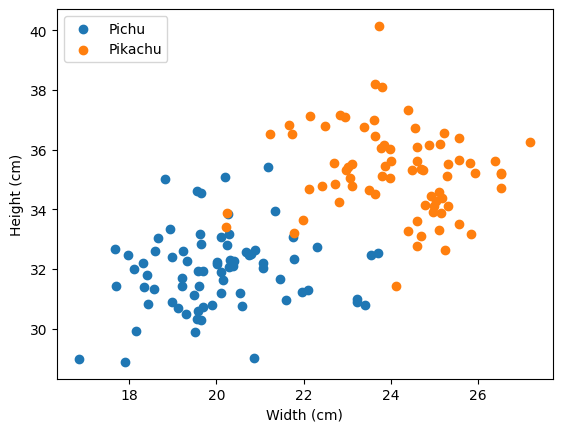

In [11]:
import math
import matplotlib.pyplot as plt
import statistics
import random
#import json



def get_pokemons():
    '''Returns a dictionry of all pokemons recognized by the program, 
    with their label as key.'''
    return {0: "Pichu", 1: "Pikachu"}



def pokemon_by_label(label):
    pokemons = get_pokemons()
    return pokemons[label]


def filtered_measurements(measurements, label):
    '''Returns a list of measurements (dictionaries) 
    with a matching label'''
    filtered = []
    for measurement in measurements:
        if measurement["label"] == label:
            filtered.append(measurement)
    return filtered


def widths_heights(measurements):
    '''Returns a dictionary with two lists containing the measured 
    heights and widths from the parameter measurements. Restructuring 
    measurement data in this way is helpful when plotting data points.'''
    widths = []
    heights = []

    for measurement in measurements:
        widths.append(measurement["width"])
        heights.append(measurement["height"])
    
    return {
        "widths": widths,
        "heights": heights
    }




def load_measurements(path, ignore_first_line = True):
    '''Returns a list with an item for each pokemon measured. 
    Each item is a dictionary with keys "width", "height" & "label".'''
    try:
        with open(path) as file:
            lines = file.readlines()
    except FileNotFoundError:
        print(f"load_measurements(): File not found '{path}'")
        return []
    except:
        print(f"load_measurements(): Unable to open file '{path}'")
        return []

    # remove "\n" at end of each line:
    lines = [line.rstrip() for line in lines]

    measurements = []

    # interpret data in each line as a measurement
    for line_number, line in enumerate(lines):
        # ignore first line (usually a heading)
        if line_number == 0 and ignore_first_line:
            continue

        try:
            line_data = line.split(", ")
            width = float(line_data[0])
            height = float(line_data[1])
            label = int(line_data[2])
        except:
            error_msg = ("load_measurements(): unable to parse data in " +
                         f"'{path}'  on line {line_number + 1}")
            print(error_msg)
            return[]
        
        measurement = {
            "width": width,
            "height": height,
            "label": label
        }
        measurements.append(measurement)
        
    return measurements



def plot_measurements(measurements):
    ''' Plots the data points from measurements using matplotlib. 
    Each plotted point is a measurement, with x value representing width 
    and y value representing height. Each pokemon "species" is represented 
    with a different color.'''

    if len(measurements) == 0:
        warning_msg = ("plot_measurements(): the argument provided is an " + 
                       "empty list. There are no data points to be plotted " +
                       "onto the graph.")
        print(warning_msg)
    
    # plot all the points of one pokemon species at a time
    for label, pokemon in get_pokemons().items():
        filtered = filtered_measurements(measurements, label)

        #print(f"{label}-{pokemon}: {len(filtered)}")

        # separate measurements into two lists ("height" and "width")
        # for plt.scatter()
        # (This could probably be solved with numpy instead...)
        w_h = widths_heights(filtered)
        plt.scatter(
            x = w_h["widths"],
            y = w_h["heights"],
            label = pokemon
        )

    # Explain axis values with labels:
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")

    # show a legend in upper left corner that explains 
    # which pokemon each color represents
    plt.legend(loc="upper left")

    # Not sure what the point of this method is...
    #plt.show()



def load_test_samples(path, ignore_first_line = True):
    try:
        with open(path) as file:
            lines = file.readlines()
    except FileNotFoundError:
        print(f"load_test_samples(): File not found '{path}'")
        return []
    except:
        print(f"load_test_samples(): Unable to open file '{path}'")
        return []

    # remove "\n" at end of each line:
    lines = [line.rstrip() for line in lines]

    samples = []

    # interpret data in each line as a measurement
    for line_number, line in enumerate(lines):
        # ignore first line (usually a heading)
        if line_number == 0 and ignore_first_line:
            continue
        try:
            # remove line numbering and parentheses
            cleaned_line = line[4:-1]
            #print(cleaned_line)
            line_data = cleaned_line.split(", ")
            width = float(line_data[0])
            height = float(line_data[1])
        except:
            error_msg = ("load_test_samples(): unable to parse data in " +
                         f"'{path}'  on line {line_number + 1}")
            print(error_msg)
            return[]
            
        sample = {
            "width": width,
            "height": height
        }
        samples.append(sample)
        
    return samples


def test_sample(sample, measurements):
    width = sample["width"]
    height = sample["height"]
    label = classify_sample(sample, measurements)
    pokemon = pokemon_by_label(label)
    sample_msg = "Sample with (width, height): "
    sample_msg += f"({width}, {height}) classified as {pokemon}"
    print(sample_msg)




def calculate_distance(m1, m2):
    '''Calculates the Euclidean distance between measurements in a 
    two dimensional space. Difference in measured width 
    is interpreted as horizontal distance, and difference in measure 
    heights as vertical distance.'''
    delta_x = m2["width"] - m1["width"]
    delta_y = m2["height"] - m1["height"]
    # the Pythegorean theorem:
    distance = math.sqrt(delta_x**2 + delta_y**2)
    return distance



def get_distance_value(a_dictionary):
    return a_dictionary["distance"]



def most_common_label(distances):
    labels = []
    for distance in distances:
        labels.append(distance["label"])

    #print(f"most_common_label(): {labels = }")

    most_common = statistics.mode(labels)
    #print(f"most_common_label(): {most_common = }")
    return most_common



def classify_sample(sample, measurements):
    distances = []
    for measurement in measurements:
        distances.append({
            "label": measurement["label"],
            "distance": calculate_distance(sample, measurement)
        })
    
    distances.sort(key=get_distance_value)
    distances = distances[:11]
    return most_common_label(distances)


def deprecated_classify_sample(sample, measurements):
    shortest_distance = None
    closest_label = None

    for measurement in measurements:
        distance = calculate_distance(sample, measurement)
        if shortest_distance == None or distance < shortest_distance:
            shortest_distance = distance
            closest_label = measurement["label"]
    return closest_label



def test_accuracy(measurements, tests = 10):
    accuracies = []
    for test_index in range(tests):
        
        temp_measurements = measurements.copy()

        random.shuffle(temp_measurements)

        training_measurements = temp_measurements[:100]
        test_measurements = temp_measurements[100:150]

        true_positives, false_positives = 0, 0
        false_negatives, true_negatives = 0, 0

        for test_measurement in test_measurements:
            predicted_label = classify_sample(test_measurement, training_measurements)
            actual_label = test_measurement["label"]
            if predicted_label == 1:
                if actual_label == 1:
                    true_positives += 1
                else:
                    false_positives += 1
            else:
                if actual_label == 1:
                    false_negatives += 1
                else:
                    true_negatives += 1

        '''print()
        print(f"{true_positives = }")
        print(f"{false_positives = }")
        print(f"{false_negatives = }")
        print(f"{true_negatives = }")'''
        
        correct_predictions = true_positives + true_negatives
        all_predictions = correct_predictions + false_positives + false_negatives
        accuracy = correct_predictions / all_predictions
        #print(f"{accuracy = }")
        accuracies.append(accuracy)

    return accuracies

def plot_accuracy(accuracies):
    pass


def enter_float(prompt = "Enter a floating point number: ", 
                accept_negative = True):
    while True:
        try:
            a_float = float(input(prompt))
        except ValueError:
            print("Invalid input. Try again.")
        else:
            if not accept_negative and a_float < 0:
                print("Negative values not accepted. Try again.")
            else:
                return a_float



mea = load_measurements("./datapoints.txt")
#print(f"{len(measurements) = }")
#serialized_measurements = json.dumps(measurements, indent=4)
#print(serialized_measurements)

#plot_measurements([])
plot_measurements(mea)

print("Let's try some test samples from a separate file:")
samples = load_test_samples("./testpoints.txt")
#print(f"{len(samples) = }")
#print(f"{samples = }")
for sample in samples:
    test_sample(sample, mea)

print("\nLet's try a sample entered in the terminal!")
entered_sample = {
    "width": enter_float("Enter a width (in cm): ", accept_negative=False),
    "height": enter_float("Enter a height (in cm): ", accept_negative=False)
}
#print(f"Let's test width={width} cm and height={height} cm")
test_sample(entered_sample, mea)


# Bonus tasks:
print("\nLet's test the accuracy of the algorithm:")

accuracies = test_accuracy(mea, 10)
print(f"{accuracies = }")

plot_accuracy(accuracies)